# Projekt graf widoczności

## Konfiguracja

In [2]:
from plot_tool import *
from create_visibility_graph import create_visibility_graph
from Point import Point
from Figure import Figure
from plotter.Plotter import Plotter

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 0.4
mpl.rcParams['grid.linewidth'] = 0.4

## Funkcje pomocnicze do tworzenia rysunków

In [3]:
from plot_tool_helpers import visibility_graph_scenes, visibility_graph_scenes_separately, shortest_path_scene
from plot_tool_helpers import get_figures_from_plot, get_points_from_plot

<br><br>
## Przykład 1 - Wyznaczenie grafu widoczności
Uwaga, dla tego przykładu opisano zostało dokładnie, co robią kolejne komórki. Należy zwrócić na to uwagę przed uruchomianiem kolejnych przykładów.

In [4]:
F = [Figure([Point(0.4, 0.4), Point(0.4458874458874459, 0.23160173160173161), Point(0.5367965367965367, 0.34199134199134207)]), Figure([Point(0.6, 0.6), Point(0.5443722943722944, 0.7380952380952381), Point(0.461038961038961, 0.6525974025974026)]), Figure([Point(0.2911255411255411, 0.6028138528138529), Point(0.7857142857142857, 0.524891774891775), Point(0.7575757575757576, 0.37770562770562777)])]

### Wyświetlenie grafu widoczności
Aby wyświetlić również dodane figury należy przejść do drugiej sceny

<IPython.core.display.Javascript object>


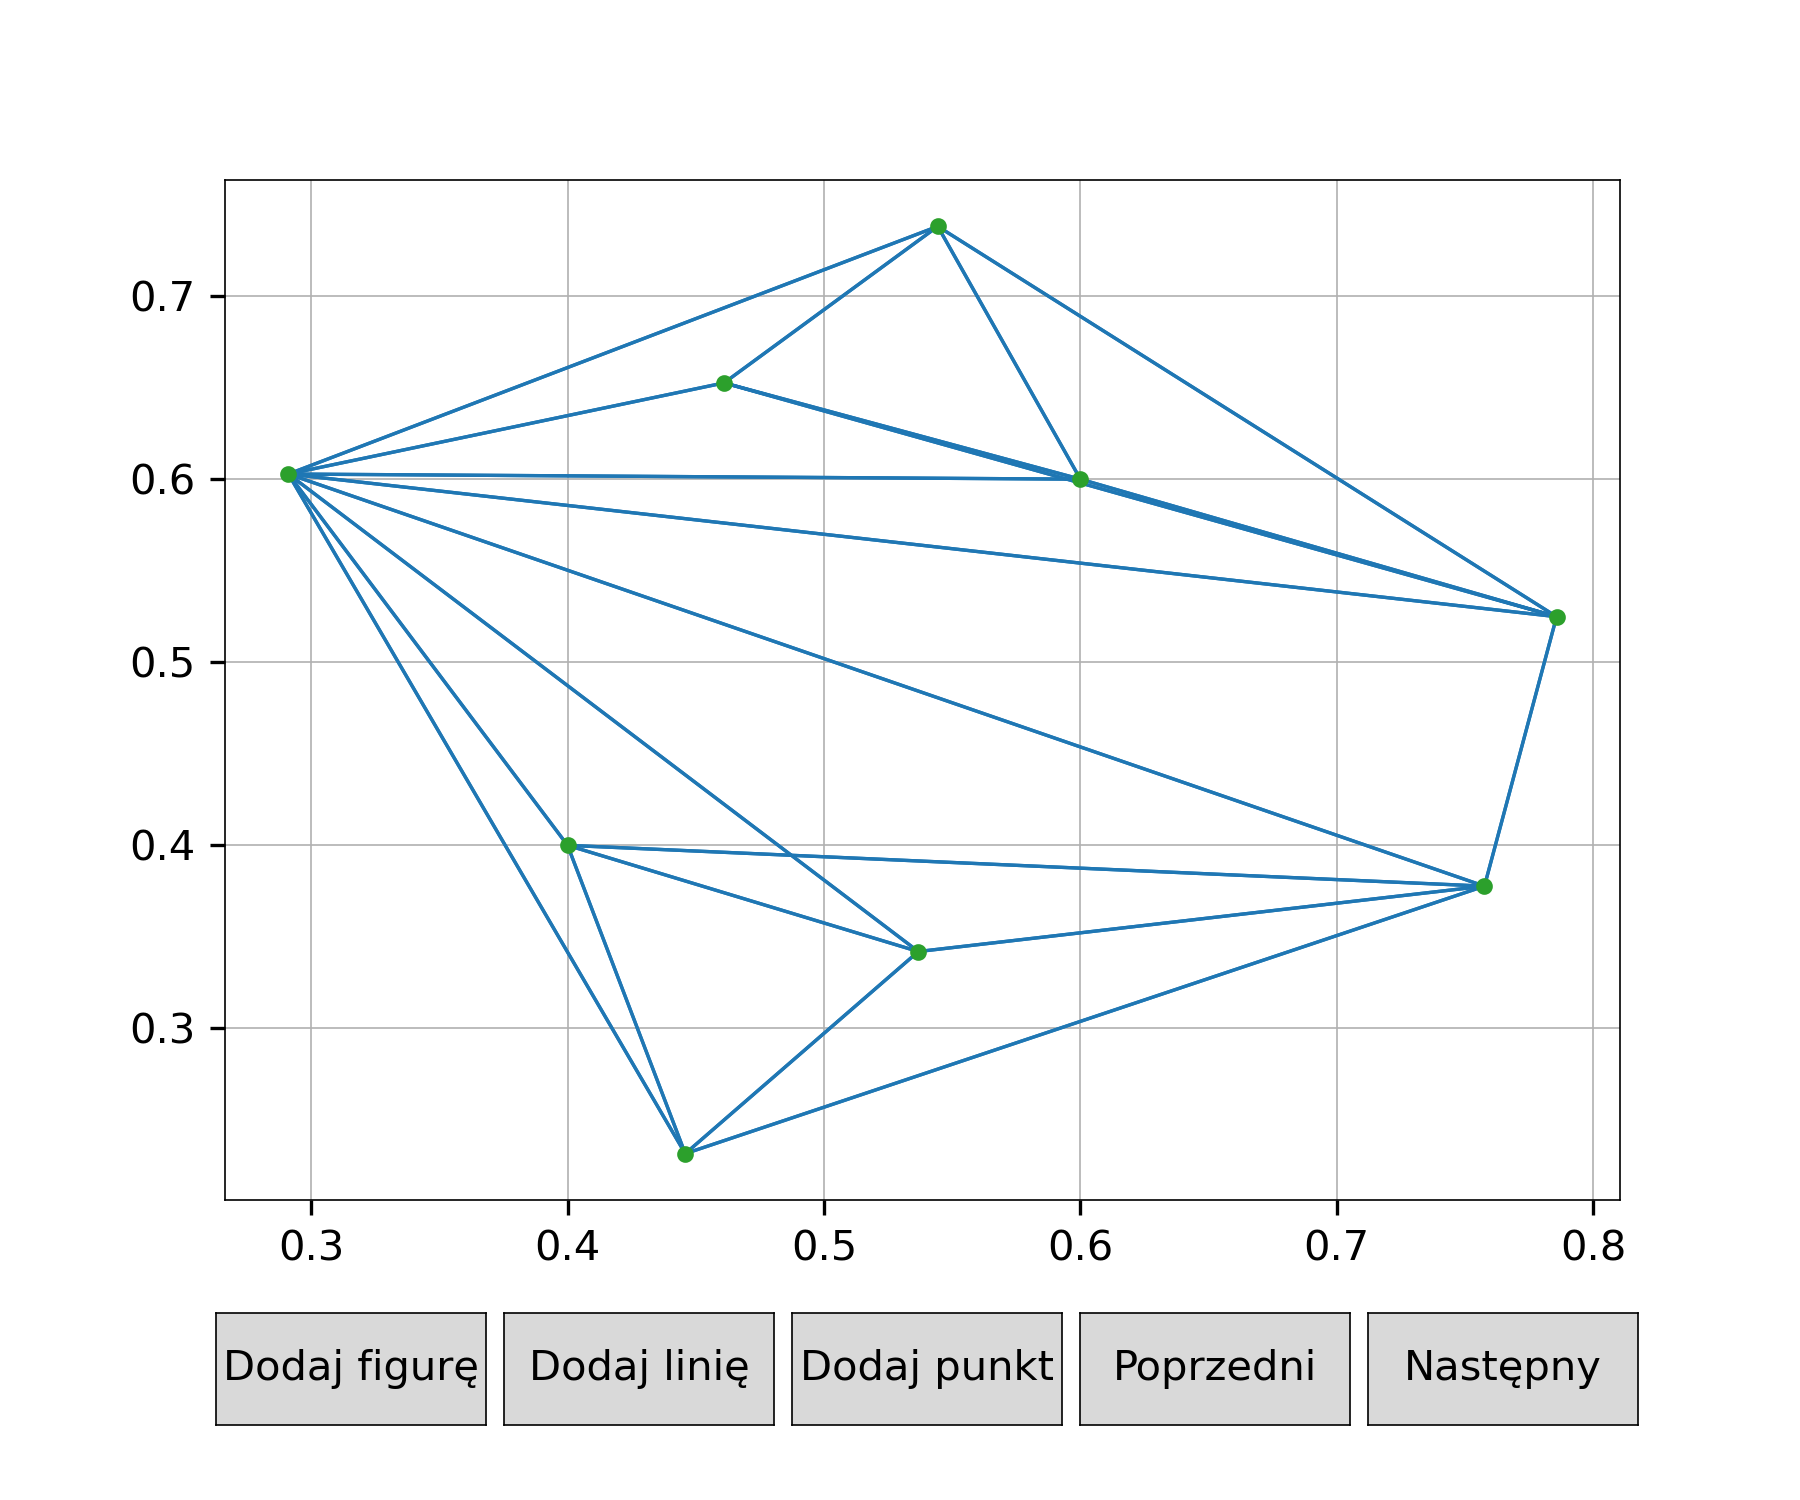

In [9]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 300, (6.0, 5.0)
plot2 = Plot(visibility_graph_scenes(F))
plot2.draw()

### Wyświetlenie incydentnych krawędzi grafu widoczności dla kolejnych wierzchołków
Krawędzie dla kolejnych wierzchołków są wyświetlane w kolejnych scenach

<IPython.core.display.Javascript object>


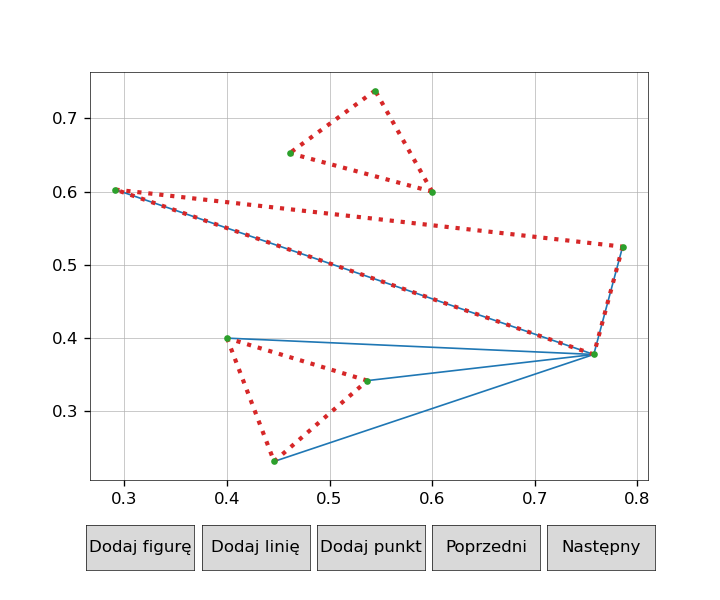

In [5]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot3 = Plot(visibility_graph_scenes_separately(F))
plot3.draw()

### Zapisywanie kolejnych kroków algorytmu do plików .jpg w folderze out
Uwaga, dla większych grafów liczba kroków jest bardzo dużo i zapisywanie jest bardzo czasochłonne

In [6]:
%matplotlib inline
plotter1 = Plotter(draw_partial=True)
create_visibility_graph(F, plotter1)
print("Zakończono zapisywanie")

Zakończono zapisywanie


<br><br>
## Wyznaczanie grafu widoczności dla wprowadzonych figur
Figury należy wprowadzać dodając wierzchołki w kolejności odwrotnej do ruchu wskazówek zegara

<IPython.core.display.Javascript object>


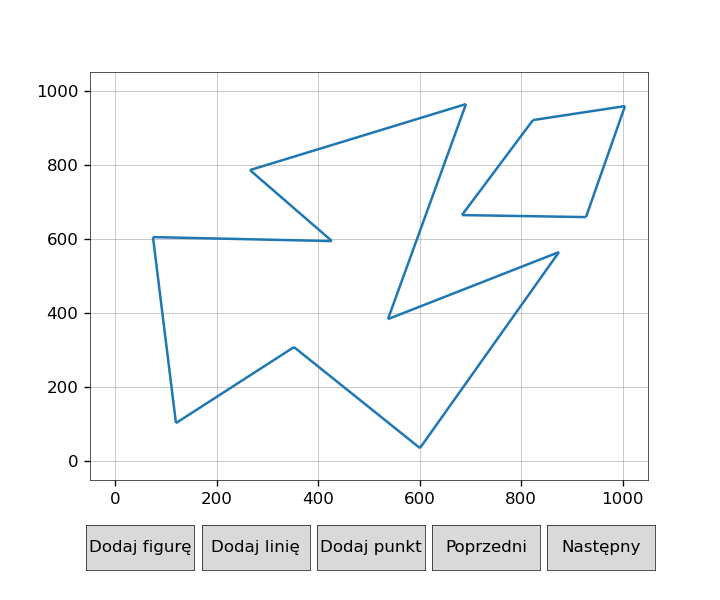

In [7]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

scenes3 = [Scene([PointsCollection([])],[LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])])]
plot3 = Plot(scenes3)
plot3.draw()

<IPython.core.display.Javascript object>


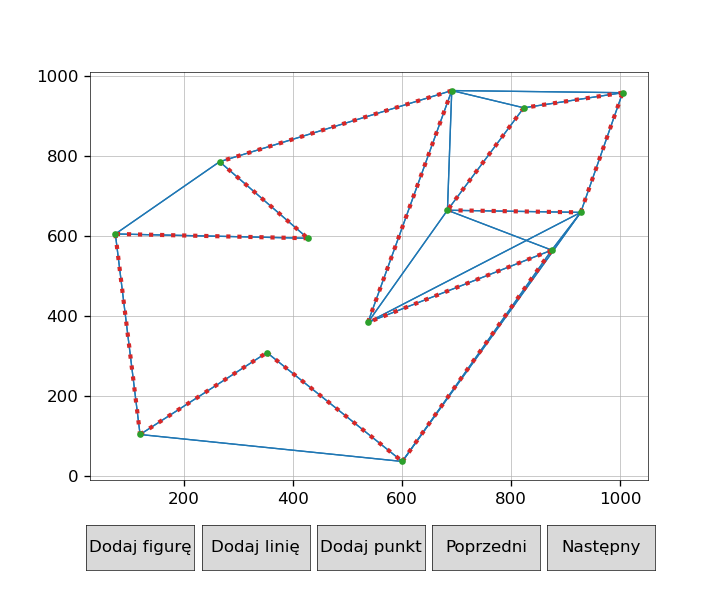

In [8]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot4 = Plot(visibility_graph_scenes(get_figures_from_plot(plot3)))
plot4.draw()

<IPython.core.display.Javascript object>


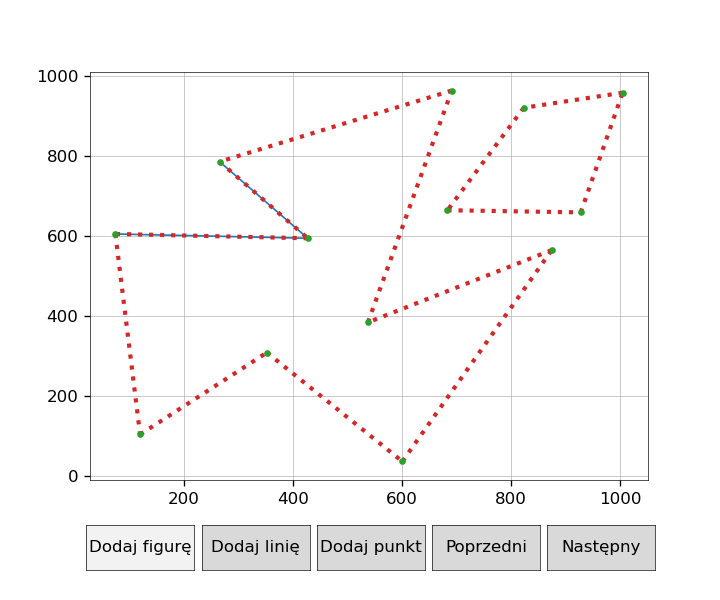

In [9]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot5 = Plot(visibility_graph_scenes_separately(get_figures_from_plot(plot3)))
plot5.draw()

In [ ]:
%matplotlib inline
plotter2 = Plotter(draw_partial=True)
create_visibility_graph(get_figures_from_plot(plot3), plotter2)
print("Zakończono zapisywanie")

<br><br>
## Wyznaczanie najkrótszej ściezki pomiędzy dwoma punktami na płaszyźnie z przeszkodami, na podstwawie wprowadzonych figur i punktów

<IPython.core.display.Javascript object>


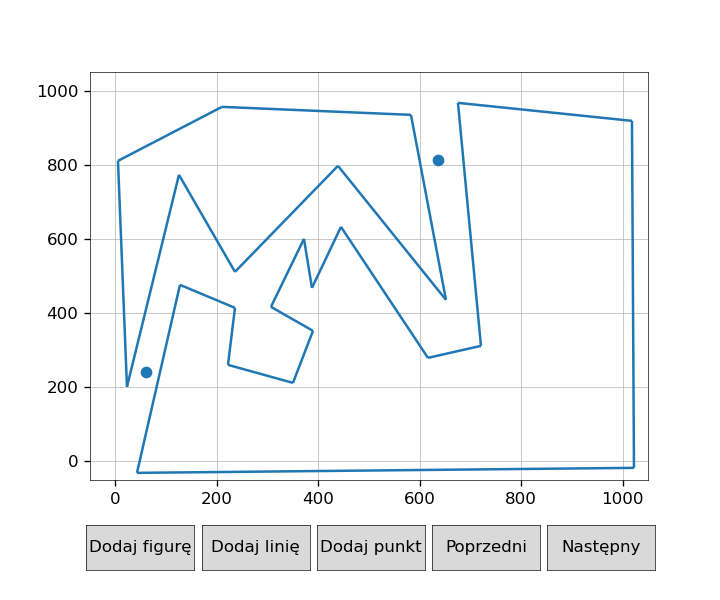

In [10]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

scenes6 = [Scene([PointsCollection([])],[LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])])]
plot6 = Plot(scenes3)
plot6.draw()

<IPython.core.display.Javascript object>


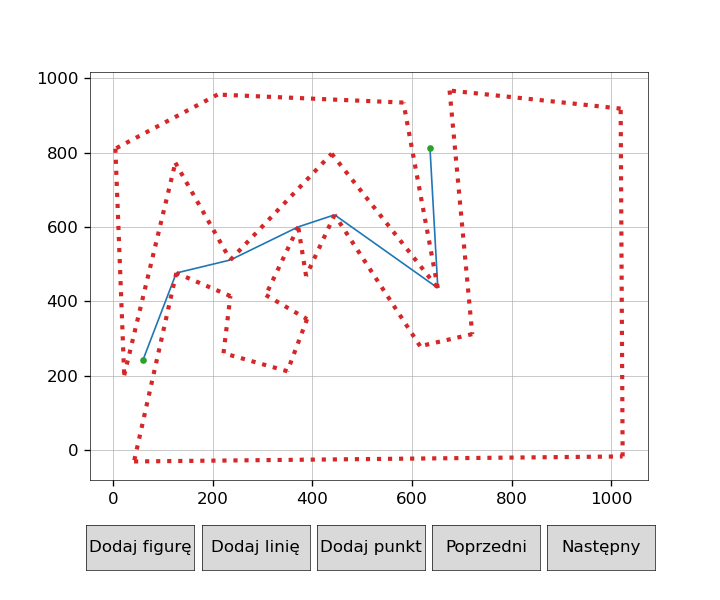

In [11]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

points = get_points_from_plot(plot6)
if len(points) >= 2:
    plot7 = Plot(shortest_path_scene(get_figures_from_plot(plot6), points[0], points[1]))
    plot7.draw()


# Testy

In [12]:
# f1 = Figure([Point(0, -3), Point(2, 2), Point(1.5, -4)])                # niebieski
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 8)])                   # czerwony
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 12), Point(4, 8)])
# f3 = Figure([Point(3, -7), Point(4.5, -3), Point(6, -6)])               # zielony

# f4 = Figure([Point(7, 0), Point(9, 0), Point(8, -2)])       # żółty
# f5 = Figure([Point(10, -2), Point(11, -2), Point(10, 0)])   # limonkowy
# f6 = Figure([Point(10, 1), Point(11, 2), Point(11, 0)])     # fioletowy

# F = [f3, f4, f5, f6]
# F = [Figure([Point(0.4, 0.4), Point(0.4458874458874459, 0.23160173160173161), Point(0.5367965367965367, 0.34199134199134207)]), Figure([Point(0.6, 0.6), Point(0.5443722943722944, 0.7380952380952381), Point(0.461038961038961, 0.6525974025974026)]), Figure([Point(0.2911255411255411, 0.6028138528138529), Point(0.7857142857142857, 0.524891774891775), Point(0.7575757575757576, 0.37770562770562777)])]


In [13]:
# testy sprawozdanie
# 1
# F = [Figure([Point(0.4, 0.6), Point(0.20129870129870128, 0.4004329004329005), Point(0.3971861471861472, 0.19480519480519484), Point(0.6125541125541125, 0.2597402597402598), Point(0.6, 0.4), Point(0.4274891774891775, 0.4101731601731602)])]

# 2 - nie działa
F = [Figure([Point(0.4, 0.6), Point(0.20129870129870128, 0.4004329004329005), Point(0.3971861471861472, 0.19480519480519484), Point(0.6125541125541125, 0.2597402597402598), Point(0.6, 0.4), Point(0.6074891774891775, 0.6101731601731602)])]

# 3
# F = [Figure([Point(0.4, 0.6), Point(0.14, 0.51), Point(0.29, 0.34)]), Figure([Point(0.6, 0.4), Point(0.59, 0.23), Point(0.88, 0.28), Point(0.83, 0.41)])]

# 4
# F = [Figure([Point(0.4, 0.6), Point(0.23, 0.54), Point(0.37, 0.38)]), Figure([Point(0.71, 0.62), Point(0.44, 0.12), Point(0.81, 0.57)]), Figure([Point(0.8, 0.2), Point(0.85, 0.38), Point(0.95, 0.2)])]

# 5
# F = [Figure([Point(0.45, 0.87), Point(0.17, 0.47), Point(0.49, 0.82)]), Figure([Point(0.6, 0.4), Point(0.42, 0.33), Point(0.54, 0.23)]), Figure([Point(0.8, 0.2), Point(0.85, 0.44), Point(0.96, 0.35)])]

# 6
# F = [Figure([Point(0.4, 0.6), Point(0.6, 0.4), Point(0.4, 0.4)]), Figure([Point(0.8, 0.2), Point(0.92, 0.25), Point(0.83, 0.09)])]

F = [Figure([Point(0.2, 0.8)])] + F
